* Variables:
*holiday: US National holidays plus regional holiday, Minnesota State Fair		no
temp	Feature	Continuous	Average temp in kelvin	Kelvin	no
rain_1h	Feature	Continuous	Amount in mm of rain that occurred in the hour	mm	no
snow_1h	Feature	Continuous	Amount in mm of snow that occurred in the hour	mm	no
clouds_all	Feature	Integer	Percentage of cloud cover	%	no
weather_main	Feature	Categorical	Short textual description of the current weather		no
weather_description	Feature	Categorical	Longer textual description of the current weather		no
date_time	Feature	Date	Hour of the data collected in local CST time		no
traffic_volume	Target	Integer	Hourly I-94 ATR 301 reported westbound traffic volume

In [48]:
from google.colab import drive
drive.mount('/content/drive')
#

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
 df = pd.read_csv('/content/drive/MyDrive/Datasets/Metro_Interstate_Traffic_Volume.csv',parse_dates=['date_time'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [52]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,2016-01-05 10:46:16.773711616,3259.818355
min,0.000000,0.000000,0.000000,0.000000,2012-10-02 09:00:00,0.000000
25%,272.160000,0.000000,0.000000,1.000000,2014-02-06 11:45:00,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,2016-06-11 03:30:00,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,2017-08-11 06:00:00,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,2018-09-30 23:00:00,7280.000000
std,13.338232,44.789133,0.008168,39.015750,NaN,1986.860670


In [53]:
df['rain_1h'].value_counts()

rain_1h
0.00    44737
0.25      948
0.51      256
1.02      123
0.30      121
        ...  
1.28        1
1.47        1
4.66        1
2.08        1
2.35        1
Name: count, Length: 372, dtype: int64

In [54]:
df.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [55]:
df.tail(15)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48189,NaN,282.18,0.00,0.0,90,Clouds,overcast clouds,2018-09-30 11:00:00,4049
48190,NaN,282.69,0.00,0.0,75,Clouds,broken clouds,2018-09-30 12:00:00,4429
48191,NaN,283.03,0.00,0.0,90,Rain,light rain,2018-09-30 13:00:00,4547
48192,NaN,283.48,0.00,0.0,90,Rain,light rain,2018-09-30 14:00:00,4380
48193,NaN,283.48,0.00,0.0,90,Drizzle,light intensity drizzle,2018-09-30 14:00:00,4380
48194,NaN,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,NaN,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,NaN,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,NaN,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132
48198,NaN,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947


In [56]:
df.isnull().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

In [57]:
df.duplicated().sum()

17

In [58]:
df.drop('holiday',axis=1,inplace=True)
#drop duplicates
df.drop_duplicates(inplace=True)


In [59]:
df.head(5)

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


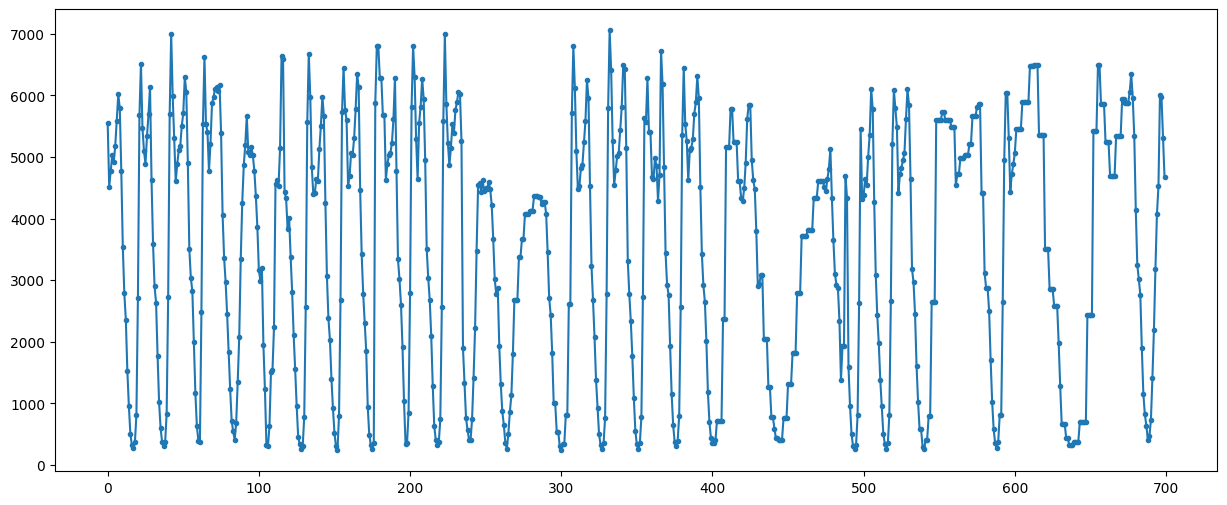

In [60]:
df_specific = df.iloc[:700]
plt.figure(figsize=(15, 6))
plt.plot(df_specific.index, df_specific['traffic_volume'], marker='.')
plt.show() # we notice there is a weekly pattern

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48182 entries, 5 to 48203
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   temp                 48182 non-null  float64       
 1   rain_1h              48182 non-null  float64       
 2   snow_1h              48182 non-null  float64       
 3   clouds_all           48182 non-null  int64         
 4   weather_main         48182 non-null  object        
 5   weather_description  48182 non-null  object        
 6   date_time            48182 non-null  datetime64[ns]
 7   traffic_volume       48182 non-null  int64         
 8   lag_1                48182 non-null  float64       
 9   lag_2                48182 non-null  float64       
 10  lag_3                48182 non-null  float64       
 11  lag_4                48182 non-null  float64       
 12  lag_5                48182 non-null  float64       
dtypes: datetime64[ns](1), float64(8), in

In [73]:
#5 lag features
for i in range(1,6):
  df[f'lag_{i}'] = df['traffic_volume'].shift(i)

df.dropna(inplace=True)


X = df.drop(columns='traffic_volume')
y = df['traffic_volume']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)  #  80% train_val  20% test
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=False)   # 80% train 20% val

In [74]:
num_col = X_train.select_dtypes(include='number').columns
cat_col = X_train.select_dtypes(include='object').columns

In [75]:
# X_train[num_col] = scaler.fit_transform(X_train[num_col])
# X_val[num_col] = scaler.transform(X_val[num_col])
# X_test[num_col] = scaler.transform(X_test[num_col])

# y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
# y_val = scaler.transform(y_val.values.reshape(-1,1))
# y_train = pd.DataFrame(y_train, columns=['traffic_volume'])
# y_val = pd.DataFrame(y_val, columns=['traffic_volume'])

In [76]:
cat_col

Index(['weather_main', 'weather_description'], dtype='object')

In [77]:
X_val

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,lag_1,lag_2,lag_3,lag_4,lag_5
30849,267.59,0.0,0.0,90,Clouds,overcast clouds,2017-02-07 16:00:00,5350.0,4646.0,4321.0,4321.0,4339.0
30850,267.15,0.0,0.0,90,Clouds,overcast clouds,2017-02-07 17:00:00,6499.0,5350.0,4646.0,4321.0,4321.0
30851,266.53,0.0,0.0,1,Clear,sky is clear,2017-02-07 18:00:00,5784.0,6499.0,5350.0,4646.0,4321.0
30852,265.89,0.0,0.0,75,Clouds,broken clouds,2017-02-07 19:00:00,4454.0,5784.0,6499.0,5350.0,4646.0
30853,265.51,0.0,0.0,40,Clouds,scattered clouds,2017-02-07 20:00:00,3103.0,4454.0,5784.0,6499.0,5350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38559,274.62,0.0,0.0,90,Drizzle,light intensity drizzle,2017-11-01 19:00:00,4297.0,4297.0,4297.0,4297.0,5858.0
38560,274.62,0.0,0.0,90,Mist,mist,2017-11-01 19:00:00,3045.0,4297.0,4297.0,4297.0,4297.0
38561,274.62,0.0,0.0,90,Rain,light rain,2017-11-01 19:00:00,3045.0,3045.0,4297.0,4297.0,4297.0
38562,274.75,0.0,0.0,90,Drizzle,light intensity drizzle,2017-11-01 20:00:00,3045.0,3045.0,3045.0,4297.0,4297.0


In [78]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [79]:
onehot = OneHotEncoder(drop='first')
scaler =  MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_col),  # Scale numerical features
        ('cat', onehot, cat_col)  # OneHotEncode categorical features
    ])



In [80]:
X_train

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,lag_1,lag_2,lag_3,lag_4,lag_5
10,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,4770.0,5791.0,6015.0,5584.0,5181.0
11,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,3539.0,4770.0,5791.0,6015.0,5584.0
12,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2784.0,3539.0,4770.0,5791.0,6015.0
13,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,2361.0,2784.0,3539.0,4770.0,5791.0
14,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,1529.0,2361.0,2784.0,3539.0,4770.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30844,268.96,0.0,0.0,90,Snow,light snow,2017-02-07 12:00:00,4339.0,4108.0,4108.0,3927.0,3927.0
30845,268.62,0.0,0.0,90,Mist,mist,2017-02-07 13:00:00,4339.0,4339.0,4108.0,4108.0,3927.0
30846,268.62,0.0,0.0,90,Snow,light snow,2017-02-07 13:00:00,4321.0,4339.0,4339.0,4108.0,4108.0
30847,267.90,0.0,0.0,90,Snow,light snow,2017-02-07 14:00:00,4321.0,4321.0,4339.0,4339.0,4108.0


In [81]:
train_time = X_train['date_time']
val_time = X_val['date_time']
test_time = X_test['date_time']


In [82]:
X_train.drop('date_time',axis=1,inplace=True)
X_val.drop('date_time',axis=1,inplace=True)      #remove timestep since it disappear after encoding then add it back after
X_test.drop('date_time',axis=1,inplace=True)

In [83]:
X_train = preprocessor.fit_transform(X_train).toarray()
X_val = preprocessor.transform(X_val).toarray()  #it outputs sparse matrix so we use .toarray()
X_test = preprocessor.transform(X_test).toarray()

In [84]:
X_train = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
X_val = pd.DataFrame(X_val, columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())

y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_val = scaler.transform(y_val.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))
y_train = pd.DataFrame(y_train, columns=['traffic_volume'])
y_val = pd.DataFrame(y_val, columns=['traffic_volume'])
y_test = pd.DataFrame(y_test, columns=['traffic_volume'])


In [85]:
X_train.dropna(inplace=True)
X_val.dropna(inplace=True)

In [86]:
X_train.set_index(train_time,inplace=True)
X_val.set_index(val_time,inplace=True)
X_test.set_index(test_time,inplace=True)

In [87]:
X_train

,num__temp,num__rain_1h,num__snow_1h,num__clouds_all,num__lag_1,num__lag_2,num__lag_3,num__lag_4,num__lag_5,cat__weather_main_Clouds,...,cat__weather_description_sleet,cat__weather_description_smoke,cat__weather_description_snow,cat__weather_description_thunderstorm,cat__weather_description_thunderstorm with drizzle,cat__weather_description_thunderstorm with heavy rain,cat__weather_description_thunderstorm with light drizzle,cat__weather_description_thunderstorm with light rain,cat__weather_description_thunderstorm with rain,cat__weather_description_very heavy rain
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 19:00:00,0.943972,0.0,0.0,0.20,0.657025,0.797658,0.828512,0.769146,0.713636,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-02 20:00:00,0.938814,0.0,0.0,0.01,0.487466,0.657025,0.797658,0.828512,0.769146,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-02 21:00:00,0.936316,0.0,0.0,0.01,0.383471,0.487466,0.657025,0.797658,0.828512,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-02 22:00:00,0.931612,0.0,0.0,0.01,0.325207,0.383471,0.487466,0.657025,0.797658,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-02 23:00:00,0.926064,0.0,0.0,0.01,0.210606,0.325207,0.383471,0.487466,0.657025,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-07 12:00:00,0.872567,0.0,0.0,0.90,0.597658,0.565840,0.565840,0.540909,0.540909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-07 13:00:00,0.871464,0.0,0.0,0.90,0.597658,0.597658,0.565840,0.565840,0.540909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-07 13:00:00,0.871464,0.0,0.0,0.90,0.595179,0.597658,0.597658,0.565840,0.565840,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
y_train

,traffic_volume
0,0.487466
1,0.383471
2,0.325207
3,0.210606
4,0.132645
...,...
30827,0.597658
30828,0.595179
30829,0.595179
30830,0.639945


In [89]:
X_train.shape

(30832, 56)

In [90]:
y_train.shape

(30832, 1)

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30832 entries, 2012-10-02 19:00:00 to 2017-02-07 15:00:00
Data columns (total 56 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   num__temp                                                     30832 non-null  float64
 1   num__rain_1h                                                  30832 non-null  float64
 2   num__snow_1h                                                  30832 non-null  float64
 3   num__clouds_all                                               30832 non-null  float64
 4   num__lag_1                                                    30832 non-null  float64
 5   num__lag_2                                                    30832 non-null  float64
 6   num__lag_3                                                    30832 non-null  float64
 7   num__lag_4                      

In [92]:
y_train.std(),y_test.std(),y_val.std()

(traffic_volume    0.273677
 dtype: float64,
 traffic_volume    0.271059
 dtype: float64,
 traffic_volume    0.276096
 dtype: float64)

In [93]:
import keras
from keras import layers

In [107]:
keras.utils.set_random_seed(42)

In [108]:
#Model Arch

model_RNN = keras.models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.SimpleRNN(32, return_sequences=True, recurrent_dropout=0.15),
    layers.SimpleRNN(64, return_sequences=True, recurrent_dropout=0.15),
    layers.Dropout(0.15),
    layers.SimpleRNN(128),
    layers.Dense(1), # <-- Regression
])

model_RNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 56, 32)            1088      
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 56, 64)            6208      
                                                                 
 dropout_5 (Dropout)         (None, 56, 64)            0         
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 128)               24704     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 32129 (125.50 KB)
Trainable params: 32129 (125.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:

model_lstm = keras.models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.LSTM(32, return_sequences=True, recurrent_dropout=0.15),
    layers.LSTM(64, return_sequences=True, recurrent_dropout=0.15),
    layers.Dropout(0.15),
    layers.LSTM(128),
    layers.Dense(1),  # <-- Regression
])

model_lstm.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 56, 32)            4352      
                                                                 
 lstm_4 (LSTM)               (None, 56, 64)            24832     
                                                                 
 dropout_6 (Dropout)         (None, 56, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               98816     
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 128129 (500.50 KB)
Trainable params: 128129 (500.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
model_gru = keras.models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.GRU(32, return_sequences=True, recurrent_dropout=0.15),
    layers.GRU(64, return_sequences=True, recurrent_dropout=0.15),
    layers.Dropout(0.15),
    layers.GRU(128),
    layers.Dense(1),  # <-- Regression
])

model_gru.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 56, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 56, 64)            18816     
                                                                 
 dropout_7 (Dropout)         (None, 56, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 128)               74496     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 96801 (378.13 KB)
Trainable params: 96801 (378.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [112]:
model_RNN.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mean_squared_error']
)

model_lstm.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mean_squared_error']
)

model_gru.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mean_squared_error']
)

In [101]:
from keras import callbacks

early_stopping = callbacks.EarlyStopping(
    patience=20,
    restore_best_weights=True,
)


In [113]:
RNN_history = model_RNN.fit(
    X_train, y_train,
    # initial_epoch=100,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, y_val),
    shuffle=False,
    callbacks=[early_stopping]
)

Epoch 1/100
241/241 [==============================] - 39s 134ms/step - loss: 0.2862 - mean_squared_error: 0.1257 - val_loss: 0.2518 - val_mean_squared_error: 0.0974
Epoch 2/100
241/241 [==============================] - 31s 128ms/step - loss: 0.2586 - mean_squared_error: 0.0939 - val_loss: 0.2458 - val_mean_squared_error: 0.0780
Epoch 3/100
241/241 [==============================] - 33s 138ms/step - loss: 0.2530 - mean_squared_error: 0.0888 - val_loss: 0.2418 - val_mean_squared_error: 0.0780
Epoch 4/100
241/241 [==============================] - 34s 142ms/step - loss: 0.2495 - mean_squared_error: 0.0860 - val_loss: 0.2387 - val_mean_squared_error: 0.0765
Epoch 5/100
241/241 [==============================] - 30s 126ms/step - loss: 0.2473 - mean_squared_error: 0.0835 - val_loss: 0.2342 - val_mean_squared_error: 0.0767
Epoch 6/100
241/241 [==============================] - 30s 125ms/step - loss: 0.2450 - mean_squared_error: 0.0813 - val_loss: 0.2358 - val_mean_squared_error: 0.0748
Epoc

In [ ]:
LSTM_history = model_lstm.fit(
     X_train, y_train,
    # initial_epoch=100,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, y_val),
    shuffle=False,
    callbacks=[early_stopping]
)

Epoch 1/100
241/241 [==============================] - 100s 383ms/step - loss: 0.1986 - mean_squared_error: 0.0640 - val_loss: 0.1670 - val_mean_squared_error: 0.0587
Epoch 2/100
241/241 [==============================] - 87s 362ms/step - loss: 0.1694 - mean_squared_error: 0.0519 - val_loss: 0.1501 - val_mean_squared_error: 0.0470
Epoch 3/100
241/241 [==============================] - 91s 377ms/step - loss: 0.1673 - mean_squared_error: 0.0512 - val_loss: 0.1508 - val_mean_squared_error: 0.0459
Epoch 4/100
241/241 [==============================] - 91s 380ms/step - loss: 0.1618 - mean_squared_error: 0.0488 - val_loss: 0.1408 - val_mean_squared_error: 0.0397
Epoch 5/100
241/241 [==============================] - 88s 364ms/step - loss: 0.1492 - mean_squared_error: 0.0419 - val_loss: 0.1327 - val_mean_squared_error: 0.0351
Epoch 6/100
241/241 [==============================] - 91s 378ms/step - loss: 0.1409 - mean_squared_error: 0.0383 - val_loss: 0.1268 - val_mean_squared_error: 0.0332
Epo

In [ ]:
GRU_history = model_gru.fit(
    X_train, y_train,
    # initial_epoch=100,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, y_val),
    shuffle=False,
    callbacks=[early_stopping]
)

In [ ]:
y_train

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import matplotlib.pyplot as plt

y_train_transformed, fitted_lambda = boxcox(y_train['traffic_volume'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, color='blue', alpha=0.7)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(y_train_transformed, bins=30, color='green', alpha=0.7)
plt.title('Box-Cox Transformed Data')

plt.tight_layout()
plt.show()

print("Fitted Lambda: ", fitted_lambda)


In [ ]:
#show me the normalized distribution of y_train
plt.hist(y_train, bins=50)
plt.show()
y_train_log = np.log1p(y_train)  # log1p is used to avoid log(0) issues


In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()